In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2.2 Data preparation

In [2]:
df = pd.read_csv('/Users/admin/Documents/Data Science/ml-zoomcamp/Session_two_linear_regression/housing.csv')

In [3]:
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# convert the records of ocean_proximity to lower case and replace the space with _

df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


# 2.3 Exploratory data analysis

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

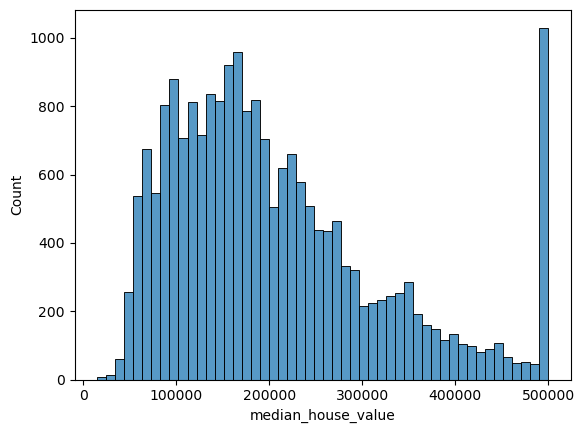

In [7]:
# a look at the median_income distribution
sns.histplot(df['median_house_value'], bins=50)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
df.drop(['ocean_proximity'], inplace=True, axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1
Find a feature with missing values. How many missing values does it have?

- 207
- 208
- 307
- 308

In [10]:
# Checking for features with missing value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms is the feature with missing values. It has 207 missing values

# Question 2
What's the median (50% percentile) for variable 'population'?

- 1133
- 1122
- 1166
- 1188

In [11]:
# Median of population features
df['population'].median()

1166.0

# Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [12]:
# Split our dataset into train, validation and test dataset
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
print("The size of validation data is: ", n_val)
print("The size of test data is: ", n_test)
print("The size of train data is: ", n_train)

The size of validation data is:  4128
The size of test data is:  4128
The size of train data is:  12384


In [14]:
n, n_val + n_test + n_train

(20640, 20640)

In [15]:
# We generate range of index number to n
idx = np.arange(n)

In [16]:
# we shuffle the dataset and seed it to two
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
#Subsetting the dataset after re-shuffling
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [21]:
# we make it our y vector
y_train = np.log1p(df_train['median_house_value']).values
y_val = np.log1p(df_val['median_house_value']).values
y_test = np.log1p(df_test['median_house_value']).values

In [22]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [23]:
# We drop msrp from our dataset to make them our X features
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
- Options:

- With 0
- With mean
- With median
- Both are equally good


# Filling the missing value with zero (0)

In [24]:
df_zero = df_train.copy()

In [25]:
df_zero.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [26]:
# fill the missing values with zero for now (note that zero is not the best way to handle missing values)
df_zero = df_zero.fillna(0)

In [27]:
df_zero.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [28]:
# Extract the value from the df_base and store as X_train
X_train_zero = df_zero.values
X_train_zero

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [29]:
# Instantiate the model

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
# Train the model
train_linear_regression(X_train_zero, y_train)

(-11.686975241970226,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [31]:
w0, w = train_linear_regression(X_train_zero, y_train)

In [32]:
y_pred = w0 + X_train_zero.dot(w)

In [33]:
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

<AxesSubplot:ylabel='Count'>

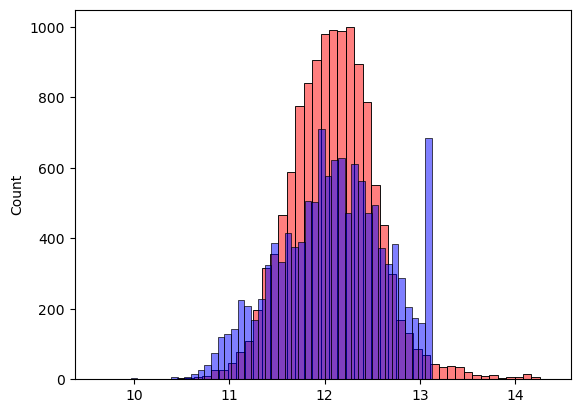

In [34]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE

In [35]:
# RMSE function declaration

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
# RMSE of zero (0) fill
rmse(y_train, y_pred).round(2)

0.34

# Filling the missing value with mean 

In [37]:
df_train_mean = df_train.copy()

In [38]:
fill_mean = df_train_mean['total_bedrooms'].mean()

In [39]:
df_train_mean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [40]:
df_train_mean = df_train_mean.fillna(fill_mean)

In [41]:
df_train_mean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [42]:
# Extract the value from the df_base and store as X_train
X_train_mean = df_train_mean.values
X_train_mean

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [43]:
# Train the model
train_linear_regression(X_train_mean, y_train)

(-11.759590872471644,
 array([-2.76809637e-01, -2.82182103e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [44]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [45]:
y_pred = w0 + X_train_mean.dot(w)

In [46]:
y_pred

array([11.37346084, 11.97238956, 12.49872828, ..., 11.53551178,
       11.92115877, 12.54500627])

<AxesSubplot:ylabel='Count'>

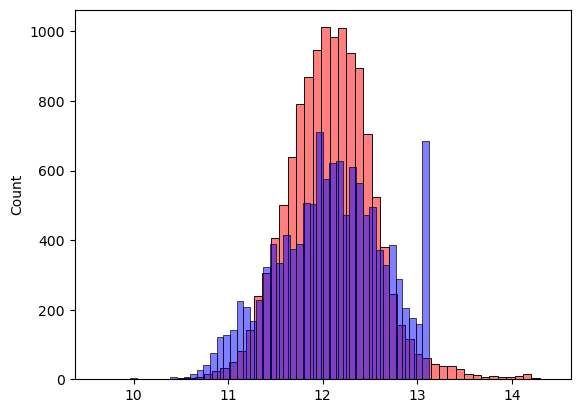

In [47]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [48]:
# RMSE of mean fill
rmse(y_train, y_pred).round(2)

0.34

# Validating the model

In [49]:
# Fill with zero
def prepare_X_zero(df):
    df_zero = df.copy()
    df_train_zero = df_zero.fillna(0)
    X = df_train_zero.values
    return X

In [50]:
X_train_zero = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train_zero, y_train)

X_val_zero = prepare_X_zero(df_val)
y_pred = w0 + X_val_zero.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [51]:
# Fill with mean
def prepare_X_mean(df):
    df_mean = df.copy()
    df_train_mean = df_mean.fillna(fill_mean)
    X = df_train_mean.values
    return X

In [52]:
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X_mean(df_val)
y_pred = w0 + X_val_mean.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.01


In [53]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [55]:
for r in reg:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0 -11.686975241970226 0.33
1e-06 -11.686959175950335 0.33
0.0001 -11.68536886556655 0.33
0.001 -11.670931318286257 0.33
0.01 -11.528493586076086 0.33
0.1 -10.274500282121712 0.33
1 -4.920480897796898 0.33
5 -1.482095745685135 0.34
10 -0.7899311832050503 0.34


# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Options:

- 0.5
- 0.05
- 0.005
- 0.0005

In [56]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
def linear_regression_seed(df, s):
    
    # Split our dataset into train, validation and test dataset
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # We generate range of index number to n
    idx = np.arange(n)
    
    # we shuffle the dataset and seed it to two
    np.random.seed(s)
    np.random.shuffle(idx)
    
    #Subsetting the dataset after re-shuffling
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # we make it our y vector
    y_train = np.log1p(df_train['median_house_value']).values
    y_val = np.log1p(df_val['median_house_value']).values
    y_test = np.log1p(df_test['median_house_value']).values

    # We drop median_house_value from our dataset to make them our X features
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Train linear regression and validate
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = (rmse(y_val, y_pred)).round(2)
    
    return score
    
    
    

In [58]:
rmse_result = []
for v in seeds:
    result = linear_regression_seed(df, s=v)
    rmse_result.append(result)
    print (v, result)

0 0.34
1 0.34
2 0.33
3 0.34
4 0.34
5 0.34
6 0.35
7 0.34
8 0.35
9 0.34


In [59]:
rmse_result = np.array(rmse_result)
rmse_result 

array([0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34])

In [60]:
std = np.std(rmse_result)
round(std, 3)

0.005

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:
- 0.35
- 0.035
- 0.45
- 0.045

In [61]:
def linear_regression_full(df, s, r):
    
    # Split our dataset into train, validation and test dataset
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # We generate range of index number to n
    idx = np.arange(n)
    
    # we shuffle the dataset and seed it to two
    np.random.seed(s)
    np.random.shuffle(idx)
    
    #Subsetting the dataset after re-shuffling
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # we make it our y vector
    y_train = np.log1p(df_train['median_house_value']).values
    y_val = np.log1p(df_val['median_house_value']).values
    y_test = np.log1p(df_test['median_house_value']).values

    # We drop median_house_value from our dataset to make them our X features
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Combine the train and validation dataset
    df_full_train = pd.concat([df_train, df_val])
    
    # reset the index
    df_full_train = df_full_train.reset_index(drop=True)
    
    # we need to get our full target i.e. y by combining y_train and y_val
    y_full_train = np.concatenate([y_train, y_val])
    
    # Train linear regression and validate
    X_full_train = prepare_X_zero(df_full_train)
    w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)

    X_test = prepare_X_zero(df_test)
    y_pred = w0 + X_test.dot(w)
    score = rmse(y_test, y_pred)
    
    return score
    

In [62]:
rmse_score = linear_regression_full(df, s=9, r=0.001)
round(rmse_score, 2)

0.35